# Radar Signal Generation


We first import the required modules of the library.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, '../src')

import numpy as np

from deepverse import ParameterManager
from deepverse import Dataset
from deepverse.wireless.Waveform import FMCW

from pprint import pprint

## FMCW Waveform

In the following, we present the FMCW (frequency modulated continuous wave) radar waveform generation. In essence, the following equation can be implemented given the path information, including
- angles of arrival & departure
- time of arrival (path delay)
- Doppler shift

The FMCW waveform can be written as

$vel[t] = \frac{d_v[t] \cdot t}{ c} $

$acc[t] = \frac{d_a[t] \cdot t^2}{2c} $

$ \tau'[t] = \tau + vel[t] + acc[t] $

$ f_{IF}[t] = S \tau'[t] $ 

$ \phi_{IF} = (f_0 - 0.5 S \tau'[t])  \tau'[t]$

$ y[t] = a_l e^{j 2 \pi (f_{IF}[t] t + \phi_{IF})}$

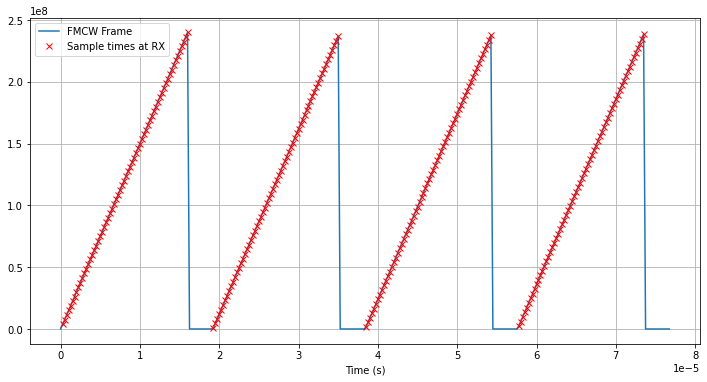

In [38]:
n_chirp = 4
n_samples_per_chirp = 64
chirp_slope = 15e12
f_0 = 28e9
Fs=4e6
T_period=n_samples_per_chirp/Fs*1.2

ramp_duration = n_samples_per_chirp / Fs
t = np.arange(0, T_period * n_chirp, 1/Fs)

t_chirp_slope = (t % T_period)
t_chirp_slope[t_chirp_slope>ramp_duration] = 0
chirps = t_chirp_slope * chirp_slope

plt.figure(figsize=(12, 6))
plt.plot(t, chirps, label='FMCW Frame')
plt.plot(t[t_chirp_slope>0], chirps[t_chirp_slope>0], 'rx', label='Sample times at RX')

plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

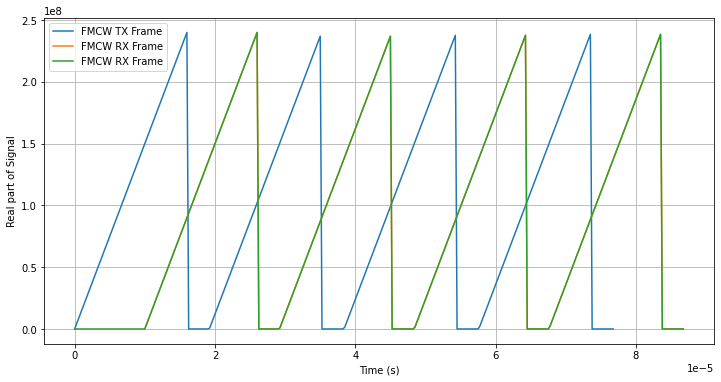

In [ ]:
ch_time_delay = 10e-6
t_rx = t + ch_time_delay

t_rx_new = np.arange(0, T_period * n_chirp + ch_time_delay, 1/Fs)
t_rx_new_norm = t_rx_new-ch_time_delay
t_chirp_slope_new = t_rx_new_norm % T_period
t_chirp_slope_new[t_chirp_slope_new>ramp_duration] = 0
t_chirp_slope_new[t_rx_new_norm<0] = 0
chirps_rx = t_chirp_slope_new * chirp_slope

plt.figure(figsize=(12, 6))
plt.plot(t, chirps, label='FMCW TX Frame')
plt.plot(t_rx, chirps, label='FMCW RX Frame')
plt.plot(t_rx_new, chirps_rx, label='FMCW RX Frame')
#plt.plot(t[t_chirp_slope>0], chirps[t_chirp_slope>0], 'rx', label='Samples at RX')

plt.xlabel('Time (s)')
plt.ylabel('Real part of Signal')
plt.legend()
plt.grid(True)
plt.show()

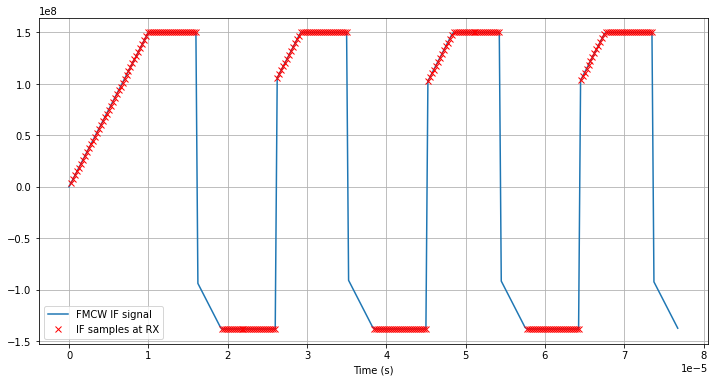

In [49]:
freq_diff = chirps-chirps_rx[:len(t)]

plt.figure(figsize=(12, 6))
plt.plot(t, freq_diff, label='FMCW IF signal')
plt.plot(t[t_chirp_slope>0], freq_diff[t_chirp_slope>0], 'rx', label='IF samples at RX')

plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()